# Data Analysis - Celebrity Deaths in 2016

Source: [Wikipedia - Deaths in 2016](https://en.wikipedia.org/wiki/Deaths_in_2016)

#### Structure of dataset:
- File: "celebrity_deaths_2016.xlsx"
- Contains 2 sheets:
 - "celeb_death": contains records of deaths of famous humans and non-humans
 - "cause_of_death": contains the causes of the deaths (you'll need to merge it with the "celeb_death" sheet)

#### Other information about the dataset:
- The cause of death was not reported for all individuals
- The dataset might include deaths that took place in other years (you'll need to ignore these records)
- The dataset might contain duplicate records (you'll need to remove them)

#### The goals of the exercise:
- Load, merge, and clean the data
- Explore the data and answer some simple questions
- Run some basic analysis
- Visualize your results

In [2]:
###########################################################
### EXECUTE THIS CELL BEFORE YOU TO TEST YOUR SOLUTIONS ###
###########################################################
!pip install xlrd --user
import imp, os, sys
import importlib
sol = imp.load_compiled("sol", "./sol.py")
from nose.tools import assert_equal
from pandas.util.testing import assert_frame_equal, assert_series_equal

You should consider upgrading via the 'pip install --upgrade pip' command.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  if __name__ == '__main__':


In [3]:
"""
We're providing most of the import statements you need for the entire exercise
"""

import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline

### Load, merge, and clean the data

In [4]:
""" 1.
1. Load the "celebrity_deaths_2016.xlsx" data file in the name "xl"
2. Print the sheet names
"""

# YOUR CODE HERE
xl = pd.ExcelFile('celebrity_deaths_2016.xlsx')
sheets = xl.sheet_names
print(sheets)


['celeb_death', 'cause_id_all', 'cause_of_death']


In [5]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(xl.sheet_names, sol.xl.sheet_names)

In [6]:
""" 2.
1. Read the "celeb_death" sheet into a dataframe named "df"
2. Take a look at the top 5 rows. Save it in a variable called 'top5', then print it
"""
# YOUR CODE HERE
df = xl.parse("celeb_death")
top5 = df.head()
print(top5)


  date of death             name age  \
0    2016-01-01        Tony Lane  71   
1    2016-01-01   Gilbert Kaplan  74   
2    2016-01-01      Brian Johns  79   
3    2016-01-01  Natasha Aguilar  45   
4    2016-01-01     Fazu Aliyeva  83   

                                                 bio  cause_id  
0              American art director (Rolling Stone)    8915.0  
1                 American conductor and businessman    2860.0  
2  Australian company director, managing director...    2860.0  
3  Costa Rican swimmer, silver and bronze medalis...   33897.0  
4                   Russian Avar poet and journalist   10648.0  


In [7]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(top5, sol.top5)

In [8]:
""" 3.
1. Take a look at the data types stored in each column in df. Store these in a variable called 'df_dtypes'
2. Get the shape of df. Store this in a variable called 'df_shape'
3. Print these
"""
# YOUR CODE HERE
df_dtypes = df.dtypes
df_shape = df.shape
print(df_dtypes)
print(df_shape)
#raise NotImplementedError()

date of death    datetime64[ns]
name                     object
age                      object
bio                      object
cause_id                float64
dtype: object
(6594, 5)


In [9]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_series_equal(df_dtypes, sol.df_dtypes)
assert_equal(df_shape, sol.df_shape)

In [10]:
""" 4.
Drop the duplicates (based on all columns) from df
"""
# YOUR CODE HERE
df = df.drop_duplicates()
# print(df)


In [11]:
assert_frame_equal(df, sol.df2)

In [12]:
""" 5.
1. Read the "cause_of_death" sheet into a DataFrame named "cause_of_death"
2. Take a look at the top 5 rows. Store this in a variable named cause_top5, then print it
"""
# YOUR CODE HERE
cause_of_death = xl.parse("cause_of_death")
cause_top5 = cause_of_death.head()
print(cause_top5)

   cause_id cause of death
0       753            ALS
1      1039           bomb
2      1120           shot
3      1499           fall
4      1629           shot


In [13]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(cause_top5, sol.cause_top5)

In [14]:
""" 6.
Drop the duplicates (based on the "cause_id" column) from the cause_of_death DataFrame

Hint: There is a single DataFrame method that does this
Use the "subset" argument to specify the "cause_id" column

Reference: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
"""
# YOUR CODE HERE

cause_of_death = cause_of_death.drop_duplicates(subset = "cause_id")

In [15]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(cause_of_death, sol.cause_of_death)

In [16]:
""" 7.
1. Merge the cause_of_death DataFrame with the df DataFrame and name the new DataFrame as "df"
2. Take a look at the top 5 rows in df. Save these in a variable called df_top5, then print it

Note: There are records in df (left DataFrame) that do not have a matching record in cause_of_death (right DataFrame)
We want to see ALL records in df despite the missing matches in cause_of_death, so you DON'T want to use an "inner join"
"""
# YOUR CODE HERE
df = pd.merge(left=df, right=cause_of_death, how='left', left_on= 'cause_id', right_on= 'cause_id')
df_top5 = df.head()

In [17]:
##########################
### TEST YOUR SOLUTION ###
##########################
assert_frame_equal(df_top5, sol.df_top5)

### Querying data

For the following questions, all the operations are on the Dataframe df.

In [18]:
""" 8.
We'll be doing some calculations with the age column, but it was loaded from the data file as dtype "object"
So first, we need to cast DataFrame df to a numeric value
"""
# YOUR CODE HERE
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [19]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_series_equal(df['age'], sol.df3['age'])

In [20]:
""" 9.
What was the average age of death? Store this value in a variable called 'avg_age', then print it
"""
# YOUR CODE HERE
avg_age = df['age'].mean()
print(avg_age)

77.03194103194103


In [21]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(avg_age, sol.avg_age)

In [22]:
""" 10.
How many people died after 70 years old because of?
-- Store the result count in a variable named "count" and print it
"""
# YOUR CODE HERE
series = df['age'] > 70
count = df[series]["age"].count()
print(count)

4752


In [23]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(count, sol.count)

In [24]:
""" 11.
Who died the youngest and what was the cause of death?
-- Store the name in a variable named "youngest_name" and print it
-- Store the cause in a variable named "youngest_cause" and print it

Hint: Get the min age and find the record that has that value
"""
# YOUR CODE HERE
youngest_age = df["age"].min()
series2 = df['age'] == youngest_age
youngest_name = df[series2]["name"]
youngest_cause = df[series2]["cause of death"]

print(youngest_age)
print(youngest_name)
print(youngest_cause)

7.0
5610    Vautour
Name: name, dtype: object
5610     euthanised
Name: cause of death, dtype: object


In [25]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_series_equal(youngest_name, sol.youngest_name)
assert_series_equal(youngest_cause, sol.youngest_cause)

In [26]:
""" 12.
We'll be running some queries based on the "bio" and "cause of death" columns, 
but they were loaded from the data file as objects.  So first, cast these two colums to strings
"""
# YOUR CODE HERE
df['bio'] = df['bio'].astype(str)
df["cause of death"] = df["cause of death"].astype(str)

In [27]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_series_equal(df['cause of death'], sol.df['cause of death'])
assert_series_equal(df['bio'], sol.df['bio'])

In [28]:
""" 13.
What is total number of deaths caused by cancer?
-- Store the result count in a variable named "count_cancer" and print it

Hint: Check if the cause_of_death is any type of (contains) "cancer"
"""
# YOUR CODE HERE
cancer = df["cause of death"].str.contains("cancer") == True
count_cancer = df[cancer]["cause of death"].count()
print(count_cancer)

518


In [29]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(count_cancer, sol.count_cancer)

In [30]:
""" 14.
How many American celebrities died?
-- Store the result count in a variable named "count_american" and print it

Hint: Search the bio for "American"
"""
# YOUR CODE HERE
american = df["bio"].str.contains("American") == True
count_american = df[american]["bio"].count()
print(count_american)

2136


In [31]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(count_american, sol.count_american)

In [32]:
""" 15.
What was one cause of death for celebrities who died at 50?
-- Name the result as "rand_cause"
-- Print the result using "print("Age 50. Cause of Death:", rand_cause)"

Hint: import random and randomly select a cause of death for celebrities who died at 50
"""

#############################################################################################
### DO NOT MODIFY THIS! WE NEED TO SEED THE RANDOM VALUE TO ACCURATELY TEST YOUR SOLUTION ###
import random
random.seed(0)
#############################################################################################

# YOUR CODE HERE
age50 = df["age"] == 50
df_age50 = df[age50]
# print(df_age50)
rand_int = random.randint(0, len(df_age50)-1)
print(rand_int)
rand_cause = df_age50["cause of death"].iloc[rand_int]
print("Age 50. Cause of Death:", rand_cause)

12
Age 50. Cause of Death:  traffic collision


In [33]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(rand_cause, sol.rand_cause)

In [34]:
""" 16.
What was the mean age for each cause of death?
Hint: import numpy and group by 'cause of death', then get the mean age and store the
resulting DataFrame in a variable named 'df_grouped_cause', then print it
"""
# README FIRST: LOOKS LIKE EITHER THE ANSWER KEY IS WRONG
# OR IF THE ANSWERKEY WAS UPDATED, THEN MINE WAS NOT UPDATED.

# YOUR CODE HERE
import numpy as np
df_grouped_cause = df.groupby(['cause of death']).agg([np.mean])["age"]
print(df_grouped_cause)

                                                mean
cause of death                                      
 Alzheimer's disease                       79.590909
 Myself and I)                             76.000000
 Parkinson's disease                       80.200000
 Parkinson's disease and multiple myeloma  69.000000
 Pick's disease                            68.000000
...                                              ...
 plane crash                               55.500000
 progressive supranuclear palsy            84.000000
 shot                                      56.500000
 stabbed                                   85.000000
 tased                                     48.000000

[334 rows x 1 columns]


In [35]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(df_grouped_cause, sol.df_grouped_cause)

AssertionError: DataFrame are different

DataFrame shape mismatch
[left]:  (334, 1)
[right]: (6574, 6)

### Count the number of people who died in each month of 2016
1. Create new columns that shows which month and year each person died in
2. Group all the entries based on the month they appeared in

In [38]:
""" 17.
Make a new column in the DataFrame df with the numeric month of death

Hint:
Use the apply() method to run a function against the "date of death" column,
and return the numeric month (get the value by using ".month")
"""


def get_month(date):
    # this function gets the month out of a datetime timestamp
    return date.month

# store month of death in new variable
df["month"] = df["date of death"].apply(get_month)


In [39]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_series_equal(df['month'], sol.df['month'])

In [40]:
""" 18.
Make a new column in the DataFrame df with the year of death

Hint: Apply a function to get the year from the "date of death" column
"""

def get_year(date):
    # this function gets the year out of a datetime timestamp
    return date.year

# store year of death in new variable
df["year"] = df["date of death"].apply(get_year)

In [41]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_series_equal(df['year'], sol.df['year'])

In [42]:
""" 19.
Filter out any deaths that didn't take place in 2016
-- Name the new DataFrame as "df_2016"
"""
ser2016 = df['year'] == 2016
df_2016 = df[ser2016]
print(df_2016)

     date of death                    name   age  \
0       2016-01-01               Tony Lane  71.0   
1       2016-01-01          Gilbert Kaplan  74.0   
2       2016-01-01             Brian Johns  79.0   
3       2016-01-01         Natasha Aguilar  45.0   
4       2016-01-01            Fazu Aliyeva  83.0   
...            ...                     ...   ...   
6559    2016-12-31          Peter Fernando  77.0   
6560    2016-12-31    Manjurul Islam Liton  48.0   
6561    2016-12-31           David Meltzer  79.0   
6562    2016-12-31  Prince Dimitri Romanov  90.0   
6563    2016-12-31          Robert Taussat  96.0   

                                                    bio  cause_id  \
0                 American art director (Rolling Stone)    8915.0   
1                    American conductor and businessman    2860.0   
2     Australian company director, managing director...    2860.0   
3     Costa Rican swimmer, silver and bronze medalis...   33897.0   
4                      Russian

In [43]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(df_2016, sol.df_2016)

In [63]:
""" 20.
Using a pivot table, obtain a list that contains the number of people that died in each month
-- Name the result as "df_per_month"
"""
# YOUR CODE HERE
import pandas as pd
import numpy as np

df_per_month = pd.pivot_table(df_2016, index=["month"], values="name", aggfunc=[len])
print(df_per_month)

       len
      name
month     
1      669
2      556
3      636
4      540
5      536
6      530
7      543
8      517
9      497
10     511
11     507
12     522


In [64]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(df_per_month, sol.df_per_month)

### Data Visualization

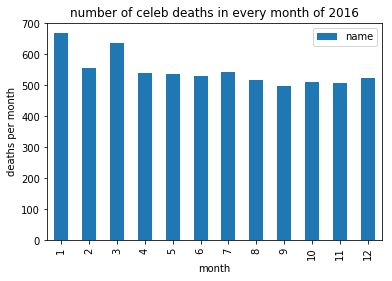

In [47]:
""" 21. 
Visualize the number of deaths per month as a bar chart

Hint: A DataFrame has a simple .plot() method you can use.  

The x axis should show the individual number of the month and the y axis should show the death counts
Don't forget to add a title and labels for the x and y axes
"""

# YOUR CODE HERE
df_per_month.plot.bar(title="number of celeb deaths in every month of 2016")
plt.xlabel('month')
plt.ylabel('deaths per month')
###########################
### DO NOT MODIFY THIS! ###
plt.show()
###########################

In [48]:
###########################
##### MAUNALLY GRADED #####
###########################

### Make a bar chart that plots the number of deaths per nationality
1. Create a new column that identifies the nationality of each celebrity, extracting the first word from the bio
2. Make a bar chart that plots the number of deaths per nationality

In [54]:
""" 22.
Create a new column in the DataFrame df that identifies the nationality of each celebrity, 
extracting the first word from the bio

Hint:
To get the nationality from the bio, use the method split() on the column "bio" 
and use the first element in the split result as the nationality.
"""

def get_nationality(bio):
    split_text = bio.split()
    nationality = split_text[0]
    return nationality
df_2016['nationality'] = df_2016['bio'].apply(get_nationality)
df['nationality'] = df['bio'].apply(get_nationality)
# print(df_2016)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_series_equal(df['nationality'], sol.df['nationality'])

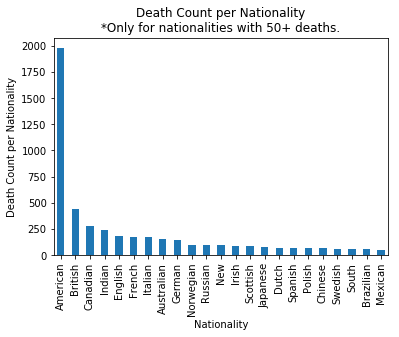

In [58]:
""" 23.
Make a bar chart that plots the number of deaths per nationality
Only include nationalities with more than 50 deaths
-- Name the resulting Series as "unlucky_countries"
Hint(s):
Get the count of unique values in the 'nationality' column using the value_counts() method.
Filter the resulting Series to only include those nationalities with a count of more than 50.
Plot the final Series.  Note, a Series has a simple .plot() method you can use.
The x axis should show the individual nationalities and the y axis should show the death counts
Don't forget to add a title and labels for the x and y axis
"""
# YOUR CODE HERE

# find unlucky nationalities
nationality_deaths = df["nationality"].value_counts()
many_deaths = nationality_deaths >= 50
unlucky_countries = nationality_deaths[many_deaths]
# print(unlucky_countries)

# plot
unlucky_countries.plot.bar(title = "Death Count per Nationality\n*Only for nationalities with 50+ deaths.")
plt.xlabel("Nationality")
plt.ylabel("Death Count per Nationality")
###########################
### DO NOT MODIFY THIS! ###
plt.show()
###########################

In [59]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_series_equal(unlucky_countries, sol.unlucky_countries)

In [61]:
###########################
##### MAUNALLY GRADED #####
###########################